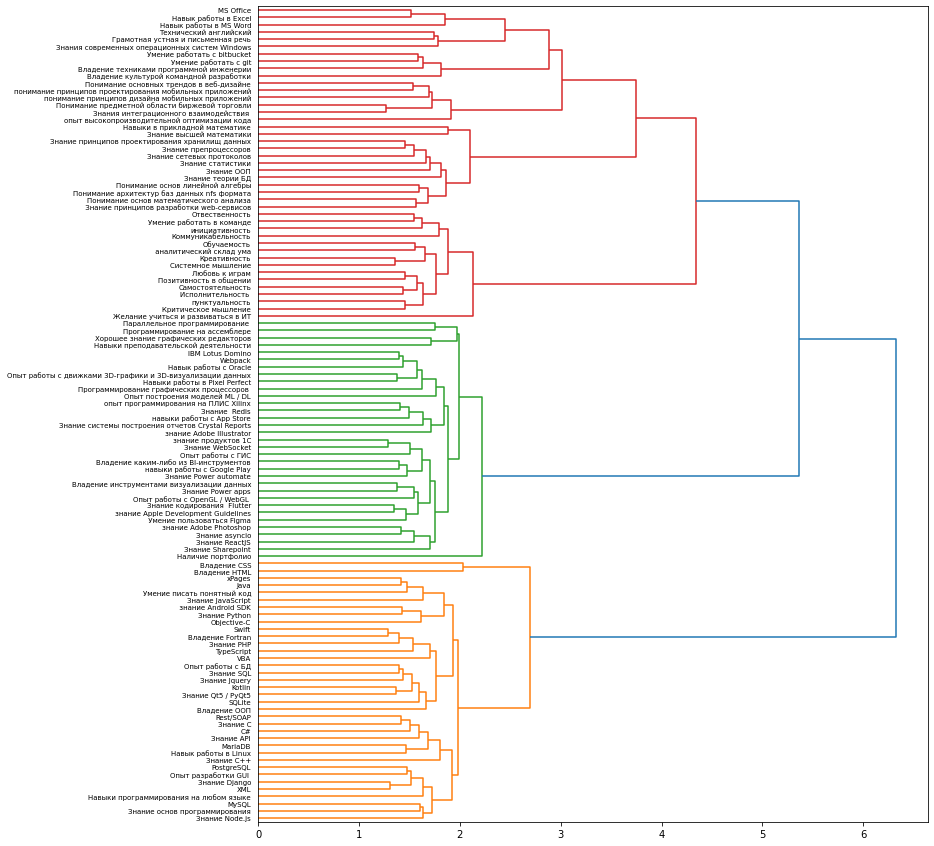

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

indicators_file = 'indicators11.xlsx'
xl = pd.ExcelFile(indicators_file)
indi_df = []
for name in xl.sheet_names:
    indi_df.append(pd.read_excel(indicators_file, sheet_name=name).set_index('Показатели'))    

res = np.zeros_like(np.matrix(indi_df[0]))
for df in indi_df:
    res += np.matrix(df)
# итоговые вероятности
p = res/(len(indi_df))

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(p, method='complete')
# Строим дендрограмму
plt.figure(figsize=(12, 15))
dendrogram(mergings,
           truncate_mode='level',
           leaf_font_size=7,
           orientation = 'right',
           labels=indi_df[0].columns
           )
plt.savefig("HierarchyTree1.png")

# максимальная дистанция между кластерами
D = 2.8
assignments = fcluster(mergings, D, 'distance')
# количество кластеров (можно подобрать, изменяя D)
C = len(np.unique(np.array(assignments)))

# группировка
groups = [[] for _ in range(C)]
for i in range(112):
    groups[assignments[i] - 1].append(indi_df[0].columns[i])

# эти группы идут в метод Дельфи
with open('groups.txt', 'w') as f:
    for i, group in enumerate(groups):
        f.write("Группа " + str(i + 1) + ":")
        for ind in group:
            f.write(ind + ', ')
        f.write('\n')


In [9]:
C

7